In [110]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
print(np.__version__)

1.16.4


# Numpy basics

## Creating arrays

In [2]:
multidata = np.array(range(1,4))
multidata

array([1, 2, 3])

### Create array with list

In [3]:
multidata = np.array([range(i,i+3) for i in [1,2,3]])
print(multidata)

[[1 2 3]
 [2 3 4]
 [3 4 5]]


### Create array with random methods

In [4]:
np.random.random((3,3))

array([[0.56111723, 0.5003165 , 0.75261144],
       [0.03164327, 0.86132758, 0.1134418 ],
       [0.02657238, 0.93060256, 0.01844359]])

In [5]:
np.random.normal(0,1,(3,3))

array([[ 0.64531849,  0.00652871,  1.91888739],
       [-0.03271505,  2.29828612, -0.10751777],
       [ 0.94534159, -0.70939134, -1.015656  ]])

In [6]:
np.random.seed(0)
np.random.randint(0,10, 6)

array([5, 0, 3, 3, 7, 9])

In [7]:
np.random.randint(0,10,(3,3))

array([[3, 5, 2],
       [4, 7, 6],
       [8, 8, 1]])

In [8]:
np.zeros((2,3), dtype="int") # "np.int16"

array([[0, 0, 0],
       [0, 0, 0]])

In [9]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [10]:
np.full((3,5),3.14)

array([[3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14]])

In [11]:
print(np.empty(5))
x= np.arange(5)
y=np.empty(5)
np.multiply(x,10,out=y)

[4.50620083e-144 4.82412328e+228 1.04718130e-142 5.04621361e+180
 7.49779533e+247]


array([ 0., 10., 20., 30., 40.])

## Array properties and slicing

In [12]:
my_grid = np.arange(16).reshape((4,4))
my_grid 
print(my_grid.shape)
print(my_grid.ndim)
print(my_grid.size)
print(my_grid.dtype)

(4, 4)
2
16
int64


In [13]:
my_grid[0][1:]

array([1, 2, 3])

In [14]:
my_grid[0][1] = 99
my_grid 

array([[ 0, 99,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [15]:
sub_arrays = my_grid[:2, :3] # views when using slice but in python slice will be copies
sub_arrays

array([[ 0, 99,  2],
       [ 4,  5,  6]])

In [16]:
sub_arrays[0][1] = 999 # because of view, the original will be influenced
my_grid

array([[  0, 999,   2,   3],
       [  4,   5,   6,   7],
       [  8,   9,  10,  11],
       [ 12,  13,  14,  15]])

In [17]:
sub_arrays_copy = my_grid[:2, :3].copy()
sub_arrays_copy[0][1] = 9999
my_grid

array([[  0, 999,   2,   3],
       [  4,   5,   6,   7],
       [  8,   9,  10,  11],
       [ 12,  13,  14,  15]])

In [18]:
sub_arrays2 = my_grid[:3, ::2]
sub_arrays2


array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [19]:
first_row = my_grid[0]
first_row

array([  0, 999,   2,   3])

In [20]:
first_column = my_grid[:,0]
first_column

array([ 0,  4,  8, 12])

## Reshaping and concatenating

In [21]:
x= np.arange(7,10)
y= np.arange(1,4)
np.concatenate((x,y))

array([7, 8, 9, 1, 2, 3])

In [22]:
x= np.array([[1,2],
              [3,4]])
y= np.array([[9,10]])
j = np.concatenate((x,y),axis = 0)
k = np.concatenate((x,y.T),axis = 1)
l = np.concatenate((x,y),axis = None)
print(j)
print(k)
print(l)

[[ 1  2]
 [ 3  4]
 [ 9 10]]
[[ 1  2  9]
 [ 3  4 10]]
[ 1  2  3  4  9 10]


In [23]:
my_grid

array([[  0, 999,   2,   3],
       [  4,   5,   6,   7],
       [  8,   9,  10,  11],
       [ 12,  13,  14,  15]])

In [24]:
np.vsplit(my_grid,2) # vertically divide it into 2 sections (row-wise)

[array([[  0, 999,   2,   3],
        [  4,   5,   6,   7]]), array([[ 8,  9, 10, 11],
        [12, 13, 14, 15]])]

In [25]:
h1,h2= np.hsplit(my_grid,2) # horizontally
print(h1)
print(h2)

[[  0 999]
 [  4   5]
 [  8   9]
 [ 12  13]]
[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]]


In [26]:
x = np.array([1,2,3])
grid = np.array([[9,8,7],
                [9,8,6]])
np.vstack([x,grid])

array([[1, 2, 3],
       [9, 8, 7],
       [9, 8, 6]])

In [27]:
y = np.array([[1],
             [2]])
np.hstack([grid, y])

array([[9, 8, 7, 1],
       [9, 8, 6, 2]])

In [28]:
x0 = np.arange(9).reshape((3,3))
2**x0

array([[  1,   2,   4],
       [  8,  16,  32],
       [ 64, 128, 256]])

## Ufuncs

In [29]:
np.random.seed(0)

def get_reciprocol(value):
    output = np.empty(len(value))
    for i in range(len(value)):
        output[i] = 1.0/value[i]
    return output

my_value = np.random.randint(1,10,1000000)
%timeit get_reciprocol(my_value)

3.85 s ± 180 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [30]:
%timeit (1.0/my_value)

1.82 ms ± 124 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [31]:
np.arange(5)/ np.arange(1,6)

array([0.        , 0.5       , 0.66666667, 0.75      , 0.8       ])

In [32]:
x = np.arange(1,4)
print(x)
print(np.add.reduce(x))
print(np.multiply.reduce(x))
print(np.add.accumulate(x))
print(np.multiply.accumulate(x))

[1 2 3]
6
6
[1 3 6]
[1 2 6]


In [33]:
x = np.random.normal(0,1,10)
abs(x)

array([0.37023505, 0.46147507, 1.76086415, 0.65411776, 0.71157957,
       0.45484658, 2.05724558, 0.55988193, 0.59935751, 1.33851942])

In [34]:
theta = np.linspace(0,np.pi,3)
print(theta)
print(np.sin(theta))

[0.         1.57079633 3.14159265]
[0.0000000e+00 1.0000000e+00 1.2246468e-16]


In [35]:
x = np.arange(1,6)
print("e^x = ", np.exp(x))
print("2^x = ", np.exp2(x))
print("3^x = ", np.power(3,x))
print("ln(x) = ", np.log(x))
print("log2(x) = ", np.log2(x))
print("log10(x) = ", np.log10(x))

e^x =  [  2.71828183   7.3890561   20.08553692  54.59815003 148.4131591 ]
2^x =  [ 2.  4.  8. 16. 32.]
3^x =  [  3   9  27  81 243]
ln(x) =  [0.         0.69314718 1.09861229 1.38629436 1.60943791]
log2(x) =  [0.         1.         1.5849625  2.         2.32192809]
log10(x) =  [0.         0.30103    0.47712125 0.60205999 0.69897   ]


In [44]:
%timeit sum(np.random.random(100000))


8.57 ms ± 153 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [45]:
%timeit np.sum(np.random.random(100000))

877 µs ± 4.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [47]:
big_array = np.random.random(1000000)
print(np.min(big_array))
print(np.max(big_array))

1.8021650157740154e-06
0.9999986430338019


In [48]:
matrix_array = np.random.random((3,4))
print(matrix_array)

[[0.7926517  0.47770825 0.67746617 0.13234302]
 [0.26579911 0.22446063 0.64993367 0.32283707]
 [0.38831726 0.43877545 0.855934   0.58320284]]


In [50]:
print("min value of each column:", matrix_array.min(axis=0))
print("min value of each row:", matrix_array.min(axis=1)) # np.min also works

min value of each column: [0.26579911 0.22446063 0.64993367 0.13234302]
min value of each row: [0.13234302 0.22446063 0.38831726]


In [74]:
print("np.sum =" ,np.sum(matrix_array))
print("np.prod =" ,np.prod(np.arange(1,4)))
print("np.prod =" ,np.prod(np.arange(1,5).reshape((2,2))))
print("np.prod =" ,np.prod(np.arange(1,5).reshape((2,2)), axis = 1))
print("np.mean =" , np.mean(np.arange(1,5)))
print("np.std =" , np.std(np.arange(1,5)))
print("np.var =" , np.std(np.arange(1,5)))
print("np.min =" , np.std(np.arange(1,5)))
print("np.argmin = ", np.argmin(matrix_array)) # 0.132
print("np.argmax = ", np.argmax(matrix_array)) # 0.855
print("np.median = ", np.median(np.arange(1,5)))

np.sum = 5.809429176563613
np.prod = 6
np.prod = 24
np.prod = [ 2 12]
np.mean = 2.5
np.std = 1.118033988749895
np.var = 1.118033988749895
np.min = 1.118033988749895
np.argmin =  3
np.argmax =  10
np.median =  2.5


In [99]:
!head -4 ../data/president_heights.csv

order,name,height(cm)
1,George Washington,189
2,John Adams,170
3,Thomas Jefferson,189


In [103]:
import os
current_work_directory = os.getcwd()
print(os.path.relpath(current_work_directory))
print(os.path.abspath(current_work_directory))
from pathlib import Path
path = Path(current_work_directory)
print(path.parent)
print(os.listdir(path.parent))
print(os.listdir(path.parent.))
# p = path.parent.glob('**/*') #Use glob to list all files and directories. And then filter it.
# files = [x for x in p if x.is_file()]
# print(files)

.
/Users/yemao/Documents/Project workspaces/ScientificTutorialSample/notebooks
/Users/yemao/Documents/Project workspaces/ScientificTutorialSample
['.DS_Store', 'requirements.txt', 'pandas_practice.py', 'models', 'Rainydays.py', 'README.md', '.git', 'main.py', 'data', 'notebooks', 'numpy_practice.py', '.idea']


In [108]:
all_data = pd.read_csv("../data/president_heights.csv")
president_heights_data = np.array(all_data['height(cm)'])
print(president_heights_data)
print("mean height:",president_heights_data.mean())
print("sd of height:",president_heights_data.std())
print("min height index:",president_heights_data.argmin())
print("president of min height is :", all_data["name"][president_heights_data.argmin()])
print("25th percentile:", np.percentile(president_heights_data,25))
print("median", np.median(president_heights_data))

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]
mean height: 179.73809523809524
sd of height: 6.931843442745892
min height index: 3
president of min height is : James Madison
25th percentile: 174.25
median 182.0


Text(0, 0.5, 'number')

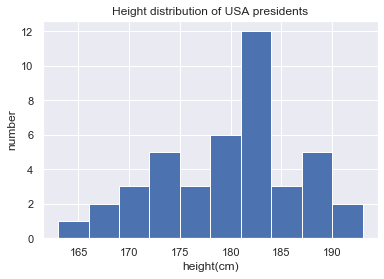

In [112]:
plt.hist(president_heights_data)
plt.title("Height distribution of USA presidents")
plt.xlabel("height(cm)")
plt.ylabel("number")

## Broadcasting